In [211]:
import yfinance as yf
from wbdata import get_data
import pandas as pd
import requests 
import matplotlib.pyplot as plt


In [212]:
brent_data = yf.download("BZ=F", start="2008-02-01", end="2023-9-10")
brent_close = brent_data['Close'].astype(float)
brent_close.index = pd.to_datetime(brent_close.index)
brent_close = brent_close.resample('W-FRI').last()

[*********************100%%**********************]  1 of 1 completed


In [213]:
#get data
housing_data = pd.read_csv('weekly_housing_2.csv', nrows=2, header=None)
housing_data = housing_data.iloc[:, 5:].transpose()
housing_data.index = housing_data[0]
housing_data.drop(0, axis=1, inplace=True)
housing_data = housing_data.astype(float)

#fixing columns
housing_data.index = pd.to_datetime(housing_data.index)
housing_data.index.name = "Date"
housing_data.columns = ['price']


#cheat by lowering date by 1
housing_data.index = housing_data.index - pd.Timedelta(days=1)

In [214]:
merged_df = housing_data.merge(brent_close, left_index=True, right_index=True, how='outer')


In [215]:
merged_df['normalized_close'] = (merged_df['Close'] - merged_df['Close'].min()) / (merged_df['Close'].max() - merged_df['Close'].min())
merged_df['normalized_price'] = (merged_df['price'] - merged_df['price'].min()) / (merged_df['price'].max() - merged_df['price'].min())


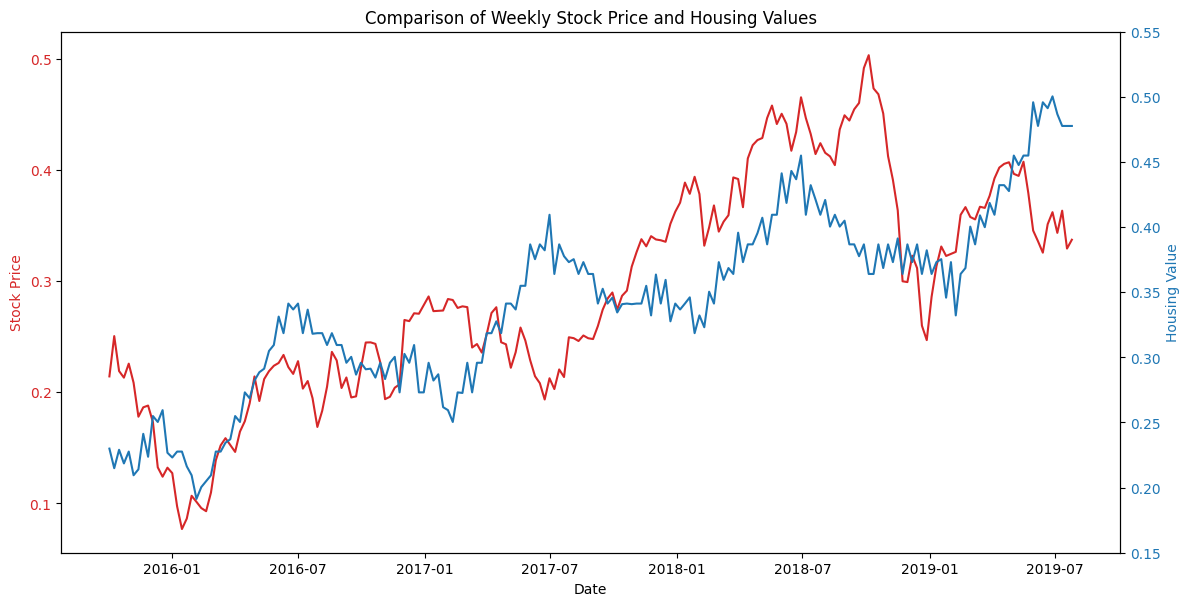

In [216]:
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color=color)
ax1.plot(merged_df.iloc[400:600].index, merged_df.iloc[400:600]['normalized_close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Housing Value', color=color)
ax2.plot(merged_df.iloc[400:600].index, merged_df.iloc[400:600]['normalized_price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_yticks(ax2.get_yticks()[::1])


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Comparison of Weekly Stock Price and Housing Values')
plt.show()


In [217]:
print(merged_df.iloc[400]['price'])

200500.0


In [218]:
countries = ["USA", "IND", "CHN"]
indicators = {
    'NY.GDP.MKTP.CD': 'GDP',
    'EG.USE.PCAP.KG.OE': 'EGUSE'
}

data = {}
data["USA"] = {}
data["USA"]["GDP"] = get_data("NY.GDP.MKTP.CD", country="USA", convert_date=False, pandas=True) 
data["USA"]["EGUSE"] = get_data("EG.USE.PCAP.KG.OE", country="USA", convert_date=False, pandas=True)
print(len(data["USA"]["EGUSE"]))

63


In [219]:
print(data)

{'USA': {'GDP': date
2022    2.546270e+13
2021    2.331508e+13
2020    2.106047e+13
2019    2.138098e+13
2018    2.053306e+13
            ...     
1964    6.858000e+11
1963    6.386000e+11
1962    6.051000e+11
1961    5.633000e+11
1960    5.433000e+11
Name: value, Length: 63, dtype: float64, 'EGUSE': date
2022            NaN
2021            NaN
2020            NaN
2019            NaN
2018            NaN
           ...     
1964    6136.938230
1963    5986.783954
1962    5774.586315
1961    5612.079503
1960    5641.740755
Name: value, Length: 63, dtype: float64}}


In [220]:
def checkindicator(url):
    r= requests.get(url)
    r = r.json()
    print(r)
    periods = r['series']['docs'][0]['period']
    values = r['series']['docs'][0]['value']
    dataset = r['series']['docs'][0]['dataset_name']
    indicators = pd.DataFrame(values,index=periods)
    indicators.columns = [dataset]
    return indicators

In [221]:
interest = checkindicator('https://api.db.nomics.world/v22/series/Eurostat/ei_mfir_m/M.NSA.NAP.MF-LTGBY-RT.EU28?observations=1')


{'_meta': {'args': {'align_periods': False, 'dataset_code': 'ei_mfir_m', 'dimensions': {}, 'facets': False, 'format': 'json', 'limit': 1000, 'metadata': True, 'observations': True, 'offset': 0, 'provider_code': 'Eurostat', 'q': '', 'series_code': 'M.NSA.NAP.MF-LTGBY-RT.EU28'}, 'version': '22.1.15'}, 'dataset': {'attributes_labels': {'OBS_STATUS': 'Observation Status'}, 'attributes_values_labels': {'OBS_STATUS': {'b': 'break in time series', 'd': 'definition differs (see metadata)', 'z': 'not applicable'}}, 'code': 'ei_mfir_m', 'dimensions_codes_order': ['FREQ', 's_adj', 'p_adj', 'indic', 'geo'], 'dimensions_labels': {'FREQ': 'Frequency', 'geo': 'Geopolitical entity (reporting)', 'indic': 'Indicator', 'p_adj': 'Price adjustment', 's_adj': 'Seasonal adjustment'}, 'dimensions_values_labels': {'FREQ': {'M': 'Monthly'}, 'geo': {'AT': 'Austria', 'BE': 'Belgium', 'BG': 'Bulgaria', 'CY': 'Cyprus', 'CZ': 'Czechia', 'DE': 'Germany', 'DK': 'Denmark', 'EA': 'Euro area (EA11-1999, EA12-2001, EA13-2

In [222]:
print(interest)

         Interest rates - monthly data
2001-01                           5.28
2001-02                           5.27
2001-03                           5.19
2001-04                           5.35
2001-05                           5.55
...                                ...
2019-09                           0.29
2019-10                           0.36
2019-11                           0.50
2019-12                           0.55
2020-01                           0.52

[229 rows x 1 columns]


In [223]:
print(test)

date
2022-01-01    2.546270e+13
2021-01-01    2.331508e+13
2020-01-01    2.106047e+13
2019-01-01    2.138098e+13
2018-01-01    2.053306e+13
                  ...     
1964-01-01    6.858000e+11
1963-01-01    6.386000e+11
1962-01-01    6.051000e+11
1961-01-01    5.633000e+11
1960-01-01    5.433000e+11
Name: value, Length: 63, dtype: float64
